In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.compose import make_column_transformer
from sklearn.metrics import silhouette_score


In [2]:
url = 'https://raw.githubusercontent.com/AndyBC27/parkinsons-disease-data/main/parkinsons_disease_data.csv'
df = pd.read_csv(url)

#df = pd.read_csv('parkinsons_disease_data.csv')

#extract important data for us
relevant_columns = ['Age', 'Gender', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'TraumaticBrainInjury', 'Diagnosis']
#df = df[relevant_columns]
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [3]:
features_for_clustering = ['Hypertension', 'Diabetes', 'Depression', 'Stroke', 'TraumaticBrainInjury'] #these are all 0 or 1
X = df[features_for_clustering]

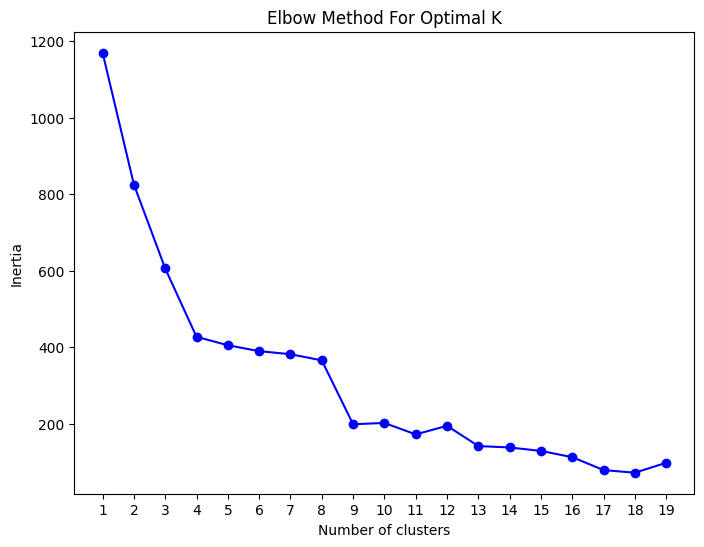

In [4]:
inertia = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k, init='random', n_init=5, random_state=100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.xticks(K)
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


The elbow method indicates the best k is k = 4 and we could also look at k=9.

In [5]:
kmeans_4 = KMeans(n_clusters=4, init='random', n_init=5, random_state=100)
df['Cluster_4'] = kmeans_4.fit_predict(X)

# Calculate silhouette score for K = 4
sil_score_4 = silhouette_score(X, df['Cluster_4'])
print(f'Silhouette Score for K=4: {sil_score_4}')

Silhouette Score for K=4: 0.6919419946077114


In [6]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge,Cluster_4
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1,0,0,0,0,0,0,0,DrXXXConfid,1
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,0,1,0,1,0,1,0,1,DrXXXConfid,1
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,1,0,0,0,1,0,1,1,DrXXXConfid,2
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,1,1,1,0,0,0,1,1,DrXXXConfid,1
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,0,0,0,1,0,1,0,0,DrXXXConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,...,1,0,0,0,1,1,0,0,DrXXXConfid,0
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,...,0,0,0,1,0,1,1,1,DrXXXConfid,1
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,...,0,0,0,0,1,1,0,1,DrXXXConfid,2
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,...,1,0,1,0,0,1,1,1,DrXXXConfid,1


In [7]:
cluster_centers_4 = kmeans_4.cluster_centers_
cluster_df_4 = pd.DataFrame(cluster_centers_4, columns=features_for_clustering)
print("Cluster Centers for K=4 (in binary scale):")
print("")
cluster_df_4

Cluster Centers for K=4 (in binary scale):



,Hypertension,Diabetes,Depression,Stroke,TraumaticBrainInjury
0,1.000000e+00,1.328125e-01,-7.771561e-16,0.054687,0.105469
1,-2.359224e-15,-2.470246e-15,4.524159e-15,0.051155,0.102310
2,4.316547e-02,1.000000e+00,2.625899e-01,0.050360,0.093525
3,1.086351e-01,6.938894e-16,1.000000e+00,0.036212,0.130919


In [8]:
cluster_distribution = df['Cluster_4'].value_counts()
print("Cluster Distribution for K=4:")
cluster_distribution

Cluster Distribution for K=4:


,count
Cluster_4,
1,1212
3,359
2,278
0,256


In [18]:
cluster_analysis = df.groupby('Cluster_4')['Diagnosis'].value_counts(normalize=True).unstack()
print("Proportion of Parkinson's Disease in each cluster:")
cluster_analysis

Proportion of Parkinson's Disease in each cluster:


Diagnosis,0,1
Cluster_4,,
0,0.398438,0.601562
1,0.404290,0.595710
2,0.309353,0.690647
3,0.342618,0.657382


In [10]:
kmeans_9 = KMeans(n_clusters=9, init='random', n_init=5, random_state=100)
df['Cluster_9'] = kmeans_9.fit_predict(X)

# Calculate silhouette score for K = 4
sil_score_9 = silhouette_score(X, df['Cluster_9'])
print(f'Silhouette Score for K=9: {sil_score_9}')

Silhouette Score for K=9: 0.830042556981706


In [20]:
cluster_analysis = df.groupby('Cluster_9')['Diagnosis'].value_counts(normalize=True).unstack()
print("Proportion of Parkinson's Disease in each cluster:")
cluster_analysis

Proportion of Parkinson's Disease in each cluster:


Diagnosis,0,1
Cluster_9,,
0,0.307937,0.692063
1,0.362245,0.637755
2,0.419825,0.580175
3,0.333333,0.666667
4,0.500000,0.500000
5,0.400000,0.600000
6,0.325581,0.674419
7,0.336735,0.663265
8,0.287356,0.712644


In [12]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Calculate the Manhattan distance matrix
manhattan_distance_matrix = pairwise_distances(X, metric='manhattan')

In [13]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering using the precomputed Manhattan distance matrix
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='precomputed', linkage='average')
df['Cluster_4_manhattan'] = agg_clustering.fit_predict(manhattan_distance_matrix)

# Evaluate the clustering
sil_score_manhattan = silhouette_score(manhattan_distance_matrix, df['Cluster_4_manhattan'], metric='precomputed')
print(f'Silhouette Score for Agglomerative Clustering with Manhattan Distance: {sil_score_manhattan}')

Silhouette Score for Agglomerative Clustering with Manhattan Distance: 0.48812933105860534


In [14]:
cluster_analysis_manhattan = df.groupby('Cluster_4_manhattan')['Diagnosis'].value_counts(normalize=True).unstack()
print("Proportion of Parkinson's Disease in each cluster (Manhattan, K=4):")
cluster_analysis_manhattan

Proportion of Parkinson's Disease in each cluster (Manhattan, K=4):


Diagnosis,0,1
Cluster_4_manhattan,,
0,0.380998,0.619002
1,0.250000,0.750000
2,0.400000,0.600000
3,NaN,1.000000


In [15]:
# Calculate the mean of each feature within each cluster
cluster_centers_manhattan = df.groupby('Cluster_4_manhattan')[features_for_clustering].mean()

print("Cluster Centers for K=4 (using Manhattan Distance):")
cluster_centers_manhattan

Cluster Centers for K=4 (using Manhattan Distance):


,Hypertension,Diabetes,Depression,Stroke,TraumaticBrainInjury
Cluster_4_manhattan,,,,,
0,0.139155,0.145873,0.203935,0.039347,0.105086
1,0.500000,1.000000,1.000000,1.000000,0.000000
2,1.000000,0.200000,0.066667,1.000000,0.200000
3,0.000000,0.500000,1.000000,1.000000,1.000000


In [19]:
# Count the number of points in each cluster
cluster_counts_manhattan = df['Cluster_4_manhattan'].value_counts()

print("Number of Points in Each Cluster (K=4, Manhattan Distance):")
cluster_counts_manhattan

Number of Points in Each Cluster (K=4, Manhattan Distance):


,count
Cluster_4_manhattan,
0,2084
2,15
1,4
3,2


In [17]:
# @markdown Run this cell to download this notebook as a webpage, `_NOTEBOOK.html`.

import google, json, nbformat

# Get the current notebook and write it to _NOTEBOOK.ipynb
raw_notebook = google.colab._message.blocking_request("get_ipynb",
                                                      timeout_sec=30)["ipynb"]
with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
  ipynb_file.write(json.dumps(raw_notebook))

# Use nbconvert to convert .ipynb to .html.
!jupyter nbconvert --to html --log-level WARN _NOTEBOOK.ipynb

# Download the .html file.
google.colab.files.download("_NOTEBOOK.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>